# CS-6570 Lecture 22 - Keras

**Dylan Zwick**

*Weber State University*

In our last class, we stepped through the math of back propagation, and went deeper into the implementation of a neural network. Today, we'll learn about Keras, a tool that handles it all for you - and probably does a better job than if you built it yourself!

Keras is a high-level deep learning [API](https://aws.amazon.com/what-is/api/) that allows you to easily build, train, evaluate, and execute all sorts of neural networks. Its documentation can be found [here](https://keras.io/). A good book, by Francois Chollet, the person who designed it, is [Deep Learning with Python](https://www.amazon.com/Learning-Python-Second-Fran%C3%A7ois-Chollet/dp/1617296864/ref=sr_1_1), one of the recommended books for this class. It has quickly gained popularity, owing to its ease of use, flexibility, and design.

To perform the heavy computations required by neural networks, Keras relies on a computations backend. At present, you can choose from (at least) TensorFlow, Microsoft Cognitive Toolkit, and Theano. In fact TensorFlow itself now comes bundled with its own Keras implementation, *tf.keras*. Unsurprisingly, it only supports TensorFlow as the backend, but it also offers some very useful extra features - for example, it supports TensorFlow's Data API, which makes it easy to load and preprocess data efficiently. For this reason, we'll use tf.keras in this class. However, most of what we do won't be TensorFlow specific, and so the code should mostly run fine on other Keras implementations as well that use Python. Note also that the PyTorch API is quite similar to Keras. This is mostly because they share a common ancestor in Scikit-Learn.

Let's first grab our standard libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

We'll now import both TensorFlow and the Keras implementation within TensorFlow. First, we'll need to install TensorFlow. Please note you only need to do this once! It will take a while the first time, and will require some disk space.

In [6]:
pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 699.6 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 1.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.3/181.3 kB 1.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.9/83.9 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 2.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.8/208.8 MB 3.2 MB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 5.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 4.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 3.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 3.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1

In [3]:
#pip install pydot

In [4]:
#pip install graphviz

In [5]:
import tensorflow as tf
from tensorflow import keras

ModuleNotFoundError: No module named 'tensorflow'

The Keras library contains a number of common machine learning datasets that you can load, including the handwritten digits dataset - [MNIST](https://keras.io/api/datasets/mnist/) - that has been our main example so far. We can import it with the code below.

In [11]:
mnist = keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

We note here that the dataset is already split into a training set and a test set, but there is no validation set, so we'll create one now. Additionally, since we are going to train the neural network using gradient descent, we must scale the input features - which are represented as integers from $0$ to $255$. We'll scale them down to the $0-1$ range.

In [13]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

Now, let's build the neural network!

***Creating the Model***

Here is a classification MLP with one hidden layer:

In [16]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(30, activation="sigmoid"))
model.add(keras.layers.Dense(10, activation="sigmoid"))

Let's go through this code line by line:

- The first line creates a *Sequential* model. This is the simplest kind of Keras model for neural networks that are composed of a single stack of layers connected sequentially.
- Next, we build the input layer and add it to the model. It is a "flatten" layer whose role is to convert each input image into a 1D array. This layer has no parameters, it just does some simple preprocessing.
- Next we add a dense hidden layer with 30 nodes (a.k.a *neurons*). It will use the sigmoid activation function. Each *Dense* layer manages its own weight matrix, containing all the connection weights between the neurons and their inputs. It also manages a vector of bias terms (one per node).
- Finally, we add a dense output layer with 10 nodes (one per class), again using the sigmoid activation function.

The potential activation functions can be found [here](https://keras.io/api/layers/activations/). Note that instead of adding the layers one-by-one, we could pass a list of layers when we create the model.

In [19]:
"""
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(30, activation="sigmoid"),
    keras.layers.Dense(10, activation="sigmoid")
    ])
"""

'\nmodel = keras.models.Sequential([\n    keras.layers.Flatten(input_shape=[28,28]),\n    keras.layers.Dense(30, activation="sigmoid"),\n    keras.layers.Dense(10, activation="sigmoid")\n    ])\n'

The model's *summary()* method displays all the model's layers, including each layer's name (which is automatically generated unless you set it when creating the layer), its output shape, and the number of parameters.

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 30)                23550     
                                                                 
 dense_1 (Dense)             (None, 10)                310       
                                                                 
Total params: 23860 (93.20 KB)
Trainable params: 23860 (93.20 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Keras even includes a tool for generating an image of the model.

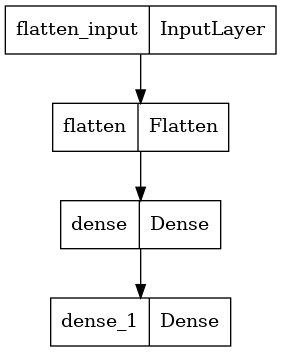

In [23]:
keras.utils.plot_model(model)

Perhaps this one is not so incredibly enlightening.

You can easily get a model's list of layers to fetch a layer by its index, or you can fetch a layer by its name.

In [26]:
model.layers

In [27]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [28]:
model.get_layer('dense') is hidden1

True

All the parameters of a layer can be accessed using its *get_weights()* and *set_weights()* methods. For a dense layer, this includes both the connection weights and the bias terms.

In [30]:
weights, biases = hidden1.get_weights()
weights

array([[-0.08134174,  0.07064746, -0.03010915, ..., -0.08482361,
         0.06325928, -0.03909576],
       [-0.05579381,  0.01353434, -0.05298186, ...,  0.07494072,
         0.05604783,  0.03241874],
       [-0.03927537,  0.05818047,  0.03424567, ..., -0.00636493,
         0.04614834,  0.0849567 ],
       ...,
       [-0.05550628, -0.01491495,  0.03300578, ...,  0.07105971,
        -0.04245766,  0.01625571],
       [ 0.00877938, -0.0159855 ,  0.03896052, ..., -0.0325163 ,
         0.01880983, -0.02092073],
       [-0.01940473,  0.02763801, -0.07948852, ..., -0.00444913,
         0.014103  , -0.05045457]], dtype=float32)

In [31]:
weights.shape

(784, 30)

In [32]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [33]:
biases.shape

(30,)

Notice the dense layer initialized the connection weights randomly (which is needed to avoid redundancy in learning), while the biases were initialized to zeros, which is fine. If you want to use different initialization methods, you can use kernel_initializer and bias_initializer. More info [here](https://keras.io/api/layers/initializers/).

***Compiling the Model***

After a model in created, you must call its *compile()* method to specify the loss function and the optimizer to use. You can also, if desired, specify a list of extra metrics to compute during training and evaluation.

In [36]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics = ["accuracy"])

This requires some explanation. First, we use the "sparse_categorical_crossentropy" loss because we have sparse labels (for each instance, there is just a target class index, from $0$ to $9$ in this case), and the classes are exclusive. If instead we had one-hot vectors we would use "categorical_crossentropy" loss instead.

Regarding the optimizer, "sgd" means that we will train the model using simple stochastic gradient descent. Note the learning rate defaults to $lr = 0.01$, but we could specify it with *optimizer = keras.optimizers.SGD(lr=???)*.

Finally, since it is a classifier, it's useful to describe its "accuracy" during training and evaluation.

See these links for more info on [losses](https://keras.io/api/losses/), [optimizers](https://keras.io/api/optimizers/), and [metrics](https://keras.io/api/metrics/).

***Training the Model***

Now the model is ready to be trained. To do this, we just call its *fit()* method.

In [40]:
history = model.fit(X_train, y_train, epochs = 10, validation_data=(X_valid,y_valid))

Epoch 1/10


2023-11-16 10:21:03.601221: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 172480000 exceeds 10% of free system memory.


1719/1719 [==============================] - 3s 2ms/step - loss: 1.6646 - accuracy: 0.6143 - val_loss: 1.1760 - val_accuracy: 0.7748
Epoch 2/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.9519 - accuracy: 0.8109 - val_loss: 0.7661 - val_accuracy: 0.8422
Epoch 3/10
1719/1719 [==============================] - 3s 1ms/step - loss: 0.6893 - accuracy: 0.8506 - val_loss: 0.5946 - val_accuracy: 0.8722
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5666 - accuracy: 0.8688 - val_loss: 0.5031 - val_accuracy: 0.8842
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4962 - accuracy: 0.8795 - val_loss: 0.4475 - val_accuracy: 0.8936
Epoch 6/10
1719/1719 [==============================] - 3s 1ms/step - loss: 0.4505 - accuracy: 0.8857 - val_loss: 0.4089 - val_accuracy: 0.9000
Epoch 7/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4184 - accuracy: 0.8913 - val_loss: 0.3814 - val_accuracy: 0.9046
Epo

Note that passing the validation set is optional. However, it's good practice. If the performance on the training set is much better than on the validation set, you've probably got an overfit model. Note that instead of passing a validation set using the *validation_data* argument, we could set *validation_split* to the ratio of the training set that you want Keras to use for validation. So, *validation_split = 0.1$ would tell Keras to use the last 10% of the data for validation.

That's it! The neural network is trained. The *fit()* method returns a *History* object containing the training parameters (history.params), the list of epochs it went through (history.epoch), and most importantly a dictionary (history.history) containing the loss and extra metrics it measured at the end of each epoch on the training data and the validation data (if provided).

We can use this dictionary to create a pandas dataframe and then plot it.

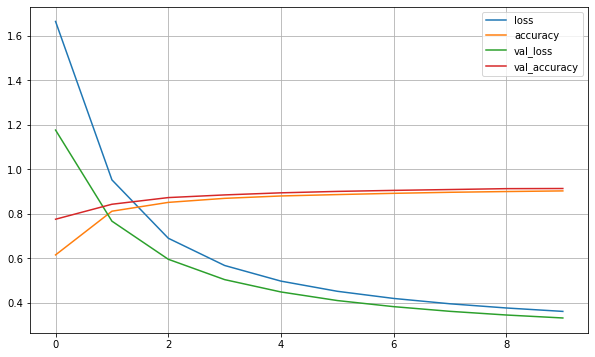

In [44]:
pd.DataFrame(history.history).plot(figsize=(10,6))
plt.grid(True)
plt.show()

The validation accuracy starts above the training accuracy. Why is this? Because the validation accuracy is calculated at the *end* of the epoch of training, while the training accuracy is calculated *during* training. Note that after 10 epochs both validation and training accuracy were quite close, and still growing, indicating that more training probably would be valuable.

If you're not satisfied with the performance of your model, you should go back and tune the hyperparameters. The first one to check is the learning rate. If that doesn't help, try another optimizer. If the performance is still not great, try tuning model hyperparameters such as the number of layers, the number of nodes per layer, and the types of activation function used for each layer.

Finally, we should verify how the model performs on the test set.

In [47]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3368 - accuracy: 0.9095


[0.3368224501609802, 0.909500002861023]

***Predicting With The Model***

We can use the model's *predict()* method to make predictions on new instances. Since we don't have actual new instances, we can just try the first three instances in the test set.

In [50]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 80ms/step


array([[0.47, 0.09, 0.45, 0.73, 0.11, 0.34, 0.01, 1.  , 0.18, 0.86],
       [0.78, 0.26, 0.98, 0.8 , 0.04, 0.84, 0.81, 0.  , 0.58, 0.03],
       [0.01, 0.99, 0.65, 0.46, 0.14, 0.31, 0.27, 0.46, 0.5 , 0.21]],
      dtype=float32)